## 2.2 PyTorch First Step

PyTorch's simple design makes it easy to get started. Before diving into PyTorch, this section will introduce some of the basics of PyTorch, so that readers can have a general understanding of PyTorch and can build a simple neural network with PyTorch. Some of the content readers may not be able to understand for the time being, but don't delve into it first. Chapters 3 and 4 of this book will explain this in depth.

This section refers to the PyTorch official tutorial [^1] and made corresponding additions and deletions, making the content more suitable for the new version of the PyTorch interface, but also more suitable for novice quick start. In addition, the book requires the reader to master the basic Numpy use. Other related knowledge recommends that the reader refer to the CS231n tutorial [^2].

[^1]: http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
[^2]: http://cs231n.github.io/python-numpy-tutorial/

### Tensor

Tensor is an important data structure in PyTorch and can be thought of as a high-dimensional array. It can be a number (scalar), a one-dimensional array (vector), a two-dimensional array (matrix), and a higher-dimensional array. Tensor is similar to Numpy's ndarrays, but Tensor can be accelerated using the GPU. The use of Tensor is very similar to that of Numpy and Matlab. Here are a few examples to see the basic use of Tensor.

In [1]:
# from __future__ import print_function
import torch as t
t.__version__

'1.1.0'

In [2]:
# Build a 5x3 matrix, just allocate space, not initialized
x = t.Tensor(5, 3)

x = t.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [3]:
# Randomly initialize a two-dimensional array using [0,1] evenly distributed
x = t.rand(5, 3)  
x

tensor([[0.9110, 0.8354, 0.7213],
        [0.8014, 0.5634, 0.7299],
        [0.1418, 0.3515, 0.9270],
        [0.9975, 0.4946, 0.3161],
        [0.4350, 0.8116, 0.8268]])

In [4]:
print(x.size()) # View the shape of x
x.size()[0], x.size(1) # View the number of columns, two equivalents

torch.Size([5, 3])


(5, 3)

`torch.Size` is a subclass of the tuple object, so it supports all operations of the tuple, such as **x.size()[0]**

In [5]:
y = t.rand(5, 3)
# The first way of adding
x + y

tensor([[1.4212, 1.2277, 1.3568],
        [1.2303, 1.4406, 1.5023],
        [1.0172, 0.9352, 1.7886],
        [1.0236, 1.3461, 0.9317],
        [0.7863, 1.3615, 0.9243]])

In [6]:
# The second way of adding
t.add(x, y)

tensor([[1.4212, 1.2277, 1.3568],
        [1.2303, 1.4406, 1.5023],
        [1.0172, 0.9352, 1.7886],
        [1.0236, 1.3461, 0.9317],
        [0.7863, 1.3615, 0.9243]])

In [7]:
# The third way of adding: specifying the output destination of the addition result
result = t.Tensor(5, 3) # Pre-allocated space
t.add(x, y, out=result) # Insert the result
result

tensor([[1.4212, 1.2277, 1.3568],
        [1.2303, 1.4406, 1.5023],
        [1.0172, 0.9352, 1.7886],
        [1.0236, 1.3461, 0.9317],
        [0.7863, 1.3615, 0.9243]])

In [8]:
print('Initial y')
print(y)

print('The first addition，the result of y')
y.add(x) # Ordinary addition, does not change the value of y
print(y)

print('Second addition, the result of y')
y.add_(x) # inplace addition，y is changed
print(y)

Initial y
tensor([[0.5102, 0.3923, 0.6355],
        [0.4290, 0.8772, 0.7724],
        [0.8754, 0.5837, 0.8616],
        [0.0261, 0.8515, 0.6156],
        [0.3512, 0.5499, 0.0975]])
The first addition，the result of y
tensor([[0.5102, 0.3923, 0.6355],
        [0.4290, 0.8772, 0.7724],
        [0.8754, 0.5837, 0.8616],
        [0.0261, 0.8515, 0.6156],
        [0.3512, 0.5499, 0.0975]])
Second addition, the result of y
tensor([[1.4212, 1.2277, 1.3568],
        [1.2303, 1.4406, 1.5023],
        [1.0172, 0.9352, 1.7886],
        [1.0236, 1.3461, 0.9317],
        [0.7863, 1.3615, 0.9243]])


Note that the function with an underscore **`_`** after the function name modifies the Tensor itself. For example, `x.add_(y)` and `x.t_()` will change `x`, but `x.add(y)` and `xt()` will return a new Tensor, and `x` will not change.

In [9]:
# Tensor's selection operation is similar to Numpy
x[:, 1]

tensor([0.8354, 0.5634, 0.3515, 0.4946, 0.8116])

Tensor also supports many operations, including mathematical operations, linear algebra, selection, slicing, etc., and its interface design is very similar to Numpy. A more detailed use of the method will be explained in the third chapter of the system.

Interoperability between arrays of Tensor and Numpy is very easy and fast. For operations that are not supported by Tensor, you can first convert to Numpy array processing and then back to Tensor.

In [6]:
a = t.ones(5) # Create a new all-one Tensor
a

tensor([1., 1., 1., 1., 1.])

In [7]:
b = a.numpy() # Tensor -> Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [8]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a) # Numpy->Tensor
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Tensor and numpy objects share memory, so the conversion between them is fast and consumes almost no resources. But it also means that if one of them changes, the other will change.

In [9]:
b.add_(1) # Functions ending with `_` will modify themselves
print(a)
print(b) # Tensor and Numpy shared memory

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


If you want to get the value of an element, you can use `scalar.item`. Direct `tensor[idx]` is still a tensor: a 0-dim tensor, commonly called scalar.

In [14]:
scalar = b[0]
scalar

tensor(2., dtype=torch.float64)

In [15]:
scalar.size() #0-dim

torch.Size([])

In [16]:
scalar.item() # Use scalar.item() to get the value of the python object from it

2.0

In [17]:
tensor = t.tensor([2]) # Note the difference between a tensor of single element and a scalar
tensor, scalar

(tensor([2]), tensor(2., dtype=torch.float64))

In [18]:
tensor.size(), scalar.size()

(torch.Size([1]), torch.Size([]))

In [19]:
# A tensor with only one element can also be converted by calling `tensor.item()``
tensor.item(), scalar.item()

(2, 2.0)

In addition, there is a similar interface to `np.array` in pytorch: `torch.tensor`, the use of the two is very similar.

In [20]:
tensor = t.tensor([3,4]) # Create a new tensor with elements 3, 4

In [21]:
scalar = t.tensor(3)
scalar

tensor(3)

In [28]:
old_tensor = tensor
new_tensor = old_tensor.clone().detach()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([3, 4]), tensor([1111,    4]))

It should be noted that `tensor.clone().tensor()` always copies data, and the new tensor and the original data no longer share memory. So if you want to share memory, it is recommended to use `t.from_numpy()` or `tensor.detach()` to create a new tensor, which shares memory.

In [30]:
new_tensor = old_tensor.detach()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([1111,    4]), tensor([1111,    4]))

Tensor can be converted to the GPU's Tensor through the `.cuda` method to enjoy the accelerated operation of the GPU.

In [31]:
# On machines that do not support CUDA, the next step is to run on the CPU.
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)
z = x+y

In addition, you can also copy tensor to gpu using `tensor.cuda()`, but this is not recommended.

It may be seen here that the speed of GPU operations has not improved much, because x and y are too small and the operation is simple, and the extra overhead is required to transfer data from memory to video memory. The advantages of GPUs need to be reflected in large-scale data and complex computing.

### autograd: Automatic differentiation

The deep learning algorithm essentially uses the backpropagation to derive the derivative, and PyTorch's **`autograd`** module implements this function. For all operations on Tensor, autograd automatically differentiates them, eliminating the complex process of manually calculating derivatives.

![图2-6:Variable的数据结构](imgs/autograd_Variable.svg)

From 0.4, Variable is officially incorporated into Tensor, and the automatic differentiation function originally implemented by Variable can be supported by Tensor. Readers can still use Variable(tensor), but this operation actually does nothing. It is recommended that readers use tensor directly in the future.*
  
To make Tensor use the autograd feature, just set `tensor.requries_grad=True`.

In [18]:
# Set the requires_grad flag for the tensor, which states that the derivative is required
# Pytorch will automatically call the autograd record operation
x = t.ones(2, 2, requires_grad=True)

# The previous step is equivalent to
# x = t.ones(2,2)
# x.requires_grad = True

print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [19]:
y = x.sum()
print(y)

tensor(4., grad_fn=<SumBackward0>)


In [20]:
y.grad_fn

In [21]:
y.backward() # Back propagation, calculation of gradient

In [22]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# The gradient of each value is 1
x.grad 

tensor([[1., 1.],
        [1., 1.]])

Note: `grad` is accumulated during backpropagation, which means that each time the backpropagation is run, the gradient accumulates the previous gradient, so the gradient needs to be cleared before backpropagation.

In [23]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [24]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [25]:
# The function that ends with an underscore is an inplace operation that modifies its own value, just like add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [26]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

### Neural Networks

Autograd implements backpropagation, but the code that is used directly to write deep learning is a bit more complicated in many cases.

Autograd implements backpropagation, but the code that used directly to write deep learning is a bit more complicated in many cases. `torch.nn` is a modular interface designed specifically for neural networks. `nn` is built on top of Autograd and can be used to define and run neural networks. `nn.Module` is the most important class in `nn`. It can be thought of as a network encapsulation, including network layer definitions and forward methods, and calling the forward(input) method to return the result of forward propagation. Let's take the earliest convolutional neural network: LeNet as an example to see how to implement it with `nn.Module`. The network structure of LeNet is shown in Figure 2-7.

![Figure 2-7:LeNet Network Sturcture](imgs/nn_lenet.png)

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

#### 定义网络

定义网络时，需要继承`nn.Module`，并实现它的forward方法，把网络中具有可学习参数的层放在构造函数`__init__`中。如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用`nn.functional`代替。

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        # 卷积 -> 激活 -> 池化 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        # reshape，‘-1’表示自适应
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用`autograd`)。在`forward` 函数中可使用任何tensor支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称。

In [35]:
params = list(net.parameters())
print(len(params))

10


In [36]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward函数的输入和输出都是Tensor。

In [37]:
input = t.randn(1, 1, 32, 32)
out = net(input)
out.size()

torch.Size([1, 10])

In [38]:
net.zero_grad() # 所有参数的梯度清零
out.backward(t.ones(1,10)) # 反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [39]:
output = net(input)
target = t.arange(0,10).view(1,10) 
criterion = nn.MSELoss()
loss = criterion(output, target)
loss # loss是个scalar

tensor(28.5625)

如果对loss进行反向传播溯源(使用`gradfn`属性)，可看到它的计算图如下：

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

当调用`loss.backward()`时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [40]:
# 运行.backward，观察调用之前和调用之后的grad
net.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([ 0.,  0.,  0.,  0.,  0.,  0.])
反向传播之后 conv1.bias的梯度
tensor(1.00000e-02 *
       [-2.2701, -1.8687,  4.3639, -2.9262, -4.3535, -5.9584])


#### 优化器

在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：
```
weight = weight - learning_rate * gradient
```

手动实现如下：

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace 减法
```

`torch.optim`中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [41]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad() 

# 计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()



####  数据加载与预处理

在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

`torchvision`实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。


### 小试牛刀：CIFAR-10分类

下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下: 

1. 使用torchvision加载并预处理CIFAR-10数据集
2. 定义网络
3. 定义损失函数和优化器
4. 训练网络并更新网络参数
5. 测试网络

####   CIFAR-10数据加载及预处理

CIFAR-10[^3]是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。

[^3]: http://www.cs.toronto.edu/~kriz/cifar.html

In [42]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [43]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。

ship


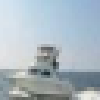

In [44]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

       bird        deer         cat        bird


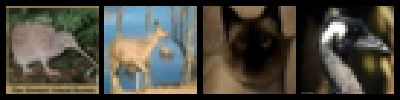

In [45]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

####   定义网络

拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [46]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


####  定义损失函数和优化器(loss和optimizer)

In [47]:
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###   训练网络

所有网络的训练流程都是类似的，不断地执行如下流程：

- 输入数据
- 前向传播+反向传播
- 更新参数


In [48]:
t.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.251
[1,  4000] loss: 1.955
[1,  6000] loss: 1.722
[1,  8000] loss: 1.590
[1, 10000] loss: 1.518
[1, 12000] loss: 1.482
[2,  2000] loss: 1.416
[2,  4000] loss: 1.385
[2,  6000] loss: 1.365
[2,  8000] loss: 1.341
[2, 10000] loss: 1.328
[2, 12000] loss: 1.307
Finished Training


此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

实际的label:       cat     ship     ship    plane


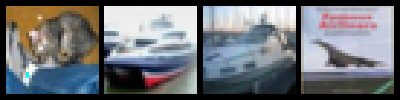

In [49]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))


接着计算网络预测的label：

In [50]:
# 计算图片在每个类别上的分数
outputs = net(images)
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:   frog   car  ship  ship


已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [51]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 53 %


训练的准确率远比随机猜测(准确率10%)好，证明网络确实学到了东西。

####  在GPU训练
就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [52]:
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")

net.to(device)
images = images.to(device)
labels = labels.to(device)
output = net(images)
loss= criterion(output,labels)

loss

tensor(1.3732)

如果发现在GPU上并没有比CPU提速很多，实际上是因为网络比较小，GPU没有完全发挥自己的真正实力。

对PyTorch的基础介绍至此结束。总结一下，本节主要包含以下内容。

1. Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
2. autograd/: 为tensor提供自动求导功能。
3. nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
4. 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。

通过本节的学习，相信读者可以体会出PyTorch具有接口简单、使用灵活等特点。从下一章开始，本书将深入系统地讲解PyTorch的各部分知识。